In [1]:
import keras
from keras.preprocessing.image import load_img, save_img, img_to_array, array_to_img
from sklearn.model_selection import train_test_split
from keras.models import load_model
import glob
import re
import PIL
from PIL import Image
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import cv2

Using TensorFlow backend.


In [2]:
def preprocess(img):
    h, w, c = img.shape
    longest_edge = max(h, w)
    top = 0
    bottom = 0
    left = 0
    right = 0
    if h < longest_edge:
        diff_h = longest_edge - h
        top = diff_h // 2
        bottom = diff_h - top
    elif w < longest_edge:
        diff_w = longest_edge - w
        left = diff_w // 2
        right = diff_w - left
    else:
        pass
    
    img = cv2.copyMakeBorder(img, top, bottom, left, right,
                             cv2.BORDER_CONSTANT, value=[0, 0, 0])
    return img

def numericalSort(value):
    numbers = re.compile(r'(\d+)')
    parts = numbers.split(value)
    parts[1::2] = map(int, parts[1::2])
    return parts

def get_img_path(dir_name:str):
    files = f"{dir_name}/"
    img_path = sorted(glob.glob(str(files+"*.jpg")), key=numericalSort)
    return img_path

def cv2pil(image):
    ''' OpenCV型 -> PIL型 '''
    new_image = image.copy()
    if new_image.ndim == 2:  # モノクロ
        pass
    elif new_image.shape[2] == 3:  # カラー
        new_image = cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB)
    elif new_image.shape[2] == 4:  # 透過
        new_image = cv2.cvtColor(new_image, cv2.COLOR_BGRA2RGBA)
    new_image = Image.fromarray(new_image)
    return new_image

In [4]:
model = load_model('use_res_12.h5')

In [74]:
trafficLight_labels = np.array([
    'green',
    'red',
    'car',
    'others'
])

# plt.figure(figsize=(16,16), dpi=1000)
plt.rcParams['figure.figsize'] = (16.0, 16.0)
index = 47
right = 0
mistake = 0

[[8.2086740e-07 3.6290387e-06 5.2209634e-06 9.9999034e-01]]
[[0.00798272 0.0221436  0.9334402  0.03643345]]
[[4.8889454e-08 1.7934008e-08 9.9999988e-01 1.7161616e-08]]
[[9.9980170e-01 9.4236308e-09 1.9828098e-04 7.3032481e-08]]
[[9.9991071e-01 2.7164276e-11 8.9243229e-05 8.2761673e-09]]
[[3.3852913e-07 2.8163976e-08 3.2795415e-05 9.9996686e-01]]
[[1.2547495e-07 3.0536171e-11 9.9999940e-01 5.3582380e-07]]
[[2.1559112e-05 4.1096712e-08 8.9170592e-04 9.9908674e-01]]
[[9.9376196e-01 1.6654023e-05 6.2104552e-03 1.0934983e-05]]
[[1.4698793e-07 4.3214189e-07 7.3986809e-07 9.9999869e-01]]
[[3.4451375e-08 4.0994217e-07 6.0466385e-07 9.9999893e-01]]
[[0. 1. 0. 0.]]
[[9.9999738e-01 2.6519343e-08 7.2079276e-10 2.6709629e-06]]
[[1.6049158e-05 9.7848147e-01 2.1266565e-02 2.3588925e-04]]
[[6.4269841e-07 2.0265113e-06 9.9996567e-01 3.1765216e-05]]
[[9.9797767e-01 3.2574713e-04 6.7028719e-05 1.6296096e-03]]
[[9.6835619e-01 1.7190957e-11 3.1594228e-02 4.9653594e-05]]
[[9.99999285e-01 1.39996565e-08 1.12

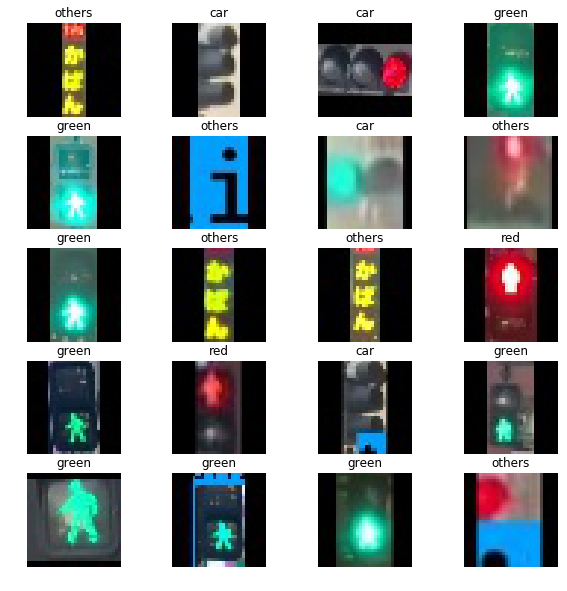

In [69]:
img_path = get_img_path("../img_data/rectangle/try")

len(img_path)

i=0
for file in img_path:
#     image = np.array(cv2pil(cv2.resize(preprocess(cv2.imread(file)), dsize=(32, 32))))
    image = np.array(Image.open(file))/255.0
    data = image.reshape((1, 32, 32, 3))
    plt.subplot(5, 4, i+1)
    plt.imshow(image)
    plt.grid(False)
    plt.axis('off')
    
    pred = model.predict(data)
    bestnum  = 0.0
    bestclass = 0
    print(pred)
    for n in [0,1,2,3]:
        if bestnum < pred[0][n]:
            bestnum = pred[0][n]
            bestclass = n
    
    plt.title(trafficLight_labels[bestclass])
    i += 1
if bestclass!=2:
    plt.show()

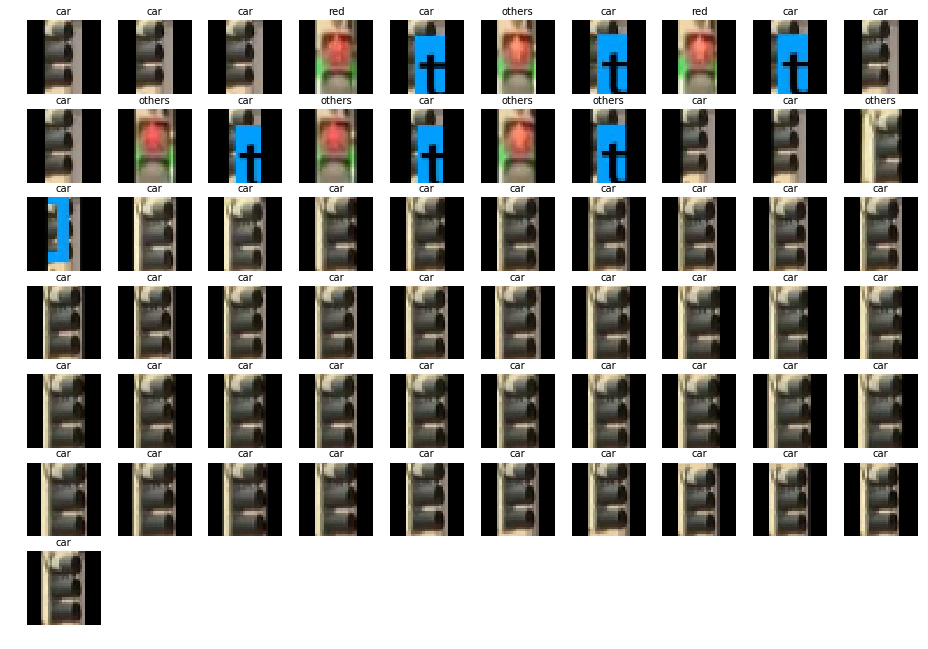

In [7]:
trafficLight_labels = np.array([
    'green',
    'red',
    'car',
    'others'
])

# plt.figure(figsize=(16,16), dpi=1000)
plt.rcParams['figure.figsize'] = (16.0, 16.0)
img_path2 = get_img_path("../img_data/rectangle/try2")
i=0
for file in img_path2:
    image = np.array(cv2pil(cv2.resize(preprocess(cv2.imread(file)), dsize=(32, 32))))/255.0
#     image = np.array(Image.open(file))/255.0
    data = image.reshape((1, 32, 32, 3))
    plt.subplot(10, 10, i+1)
    plt.imshow(image)
    plt.grid(False)
    plt.axis('off')
    
    pred = model.predict(data)
    bestnum  = 0.0
    bestclass = 0
    for n in [0,1,2,3]:
        if bestnum < pred[0][n]:
            bestnum = pred[0][n]
            bestclass = n
    
    plt.title(trafficLight_labels[bestclass], fontsize=10)
    i += 1
if bestclass!=2:
    plt.show()

In [5]:
model = load_model('./history/use_res_12.h5')

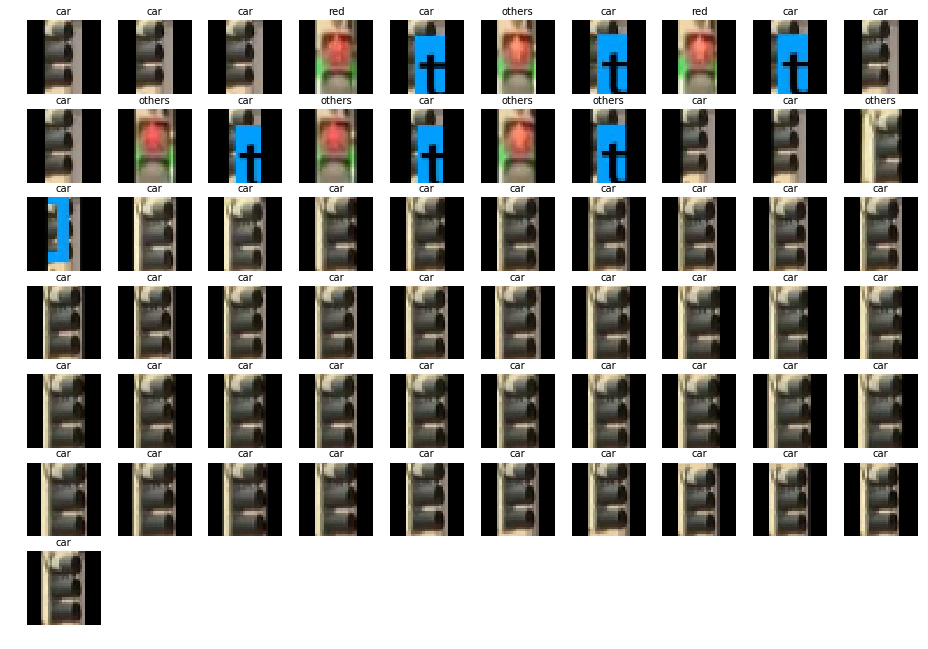

In [8]:
trafficLight_labels = np.array([
    'green',
    'red',
    'car',
    'others'
])
img_path2 = get_img_path("../img_data/rectangle/try2")
i=0
for file in img_path2:
    image = np.array(cv2pil(cv2.resize(preprocess(cv2.imread(file)), dsize=(32, 32))))/255.0
#     image = np.array(Image.open(file))/255.0
    data = image.reshape((1, 32, 32, 3))
    plt.subplot(10, 10, i+1)
    plt.imshow(image)
    plt.grid(False)
    plt.axis('off')
    
    pred = model.predict(data)
    bestnum  = 0.0
    bestclass = 0
    for n in [0,1,2,3]:
        if bestnum < pred[0][n]:
            bestnum = pred[0][n]
            bestclass = n
    
    plt.title(trafficLight_labels[bestclass], fontsize=10)
    i += 1
if bestclass!=2:
    plt.show()

[[8.2086740e-07 3.6290387e-06 5.2209634e-06 9.9999034e-01]]
[[0.00798272 0.02214363 0.9334402  0.03643344]]
[[4.8889639e-08 1.7934111e-08 9.9999988e-01 1.7161584e-08]]
[[9.998017e-01 9.423595e-09 1.982806e-04 7.303248e-08]]
[[9.9991071e-01 2.7164276e-11 8.9243316e-05 8.2761833e-09]]
[[3.3852913e-07 2.8163976e-08 3.2795415e-05 9.9996686e-01]]
[[1.2547473e-07 3.0536056e-11 9.9999940e-01 5.3582329e-07]]
[[2.1559175e-05 4.1096794e-08 8.9170801e-04 9.9908674e-01]]
[[9.9376196e-01 1.6654023e-05 6.2104613e-03 1.0934961e-05]]
[[1.4698752e-07 4.3214106e-07 7.3986809e-07 9.9999869e-01]]
[[3.4451311e-08 4.0994294e-07 6.0466385e-07 9.9999893e-01]]
[[0. 1. 0. 0.]]
[[9.9999738e-01 2.6519343e-08 7.2079415e-10 2.6709602e-06]]
[[1.6049129e-05 9.7848147e-01 2.1266548e-02 2.3588901e-04]]
[[6.4269904e-07 2.0265172e-06 9.9996567e-01 3.1765310e-05]]
[[9.9797767e-01 3.2574713e-04 6.7028523e-05 1.6296111e-03]]
[[9.6835619e-01 1.7190990e-11 3.1594161e-02 4.9653547e-05]]
[[9.99999285e-01 1.39996565e-08 1.123452

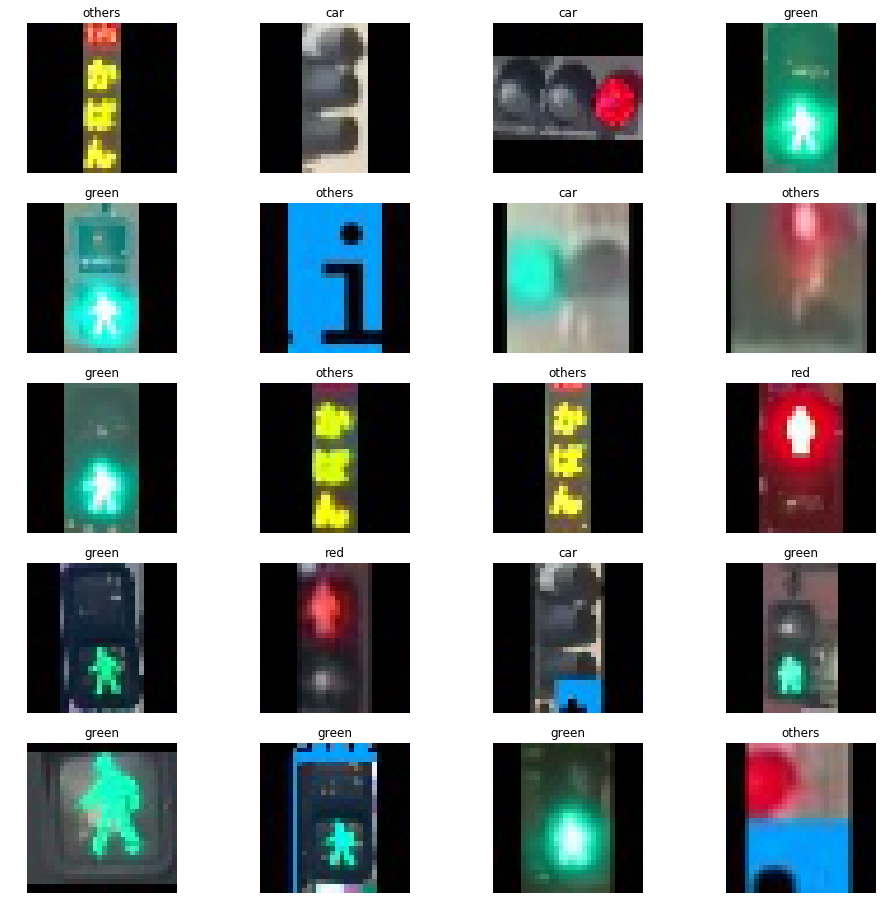

In [9]:
img_path = get_img_path("../img_data/rectangle/try")

len(img_path)

i=0
for file in img_path:
#     image = np.array(cv2pil(cv2.resize(preprocess(cv2.imread(file)), dsize=(32, 32))))
    image = np.array(Image.open(file))/255.0
    data = image.reshape((1, 32, 32, 3))
    plt.subplot(5, 4, i+1)
    plt.imshow(image)
    plt.grid(False)
    plt.axis('off')
    
    pred = model.predict(data)
    bestnum  = 0.0
    bestclass = 0
    print(pred)
    for n in [0,1,2,3]:
        if bestnum < pred[0][n]:
            bestnum = pred[0][n]
            bestclass = n
    
    plt.title(trafficLight_labels[bestclass])
    i += 1
if bestclass!=2:
    plt.show()

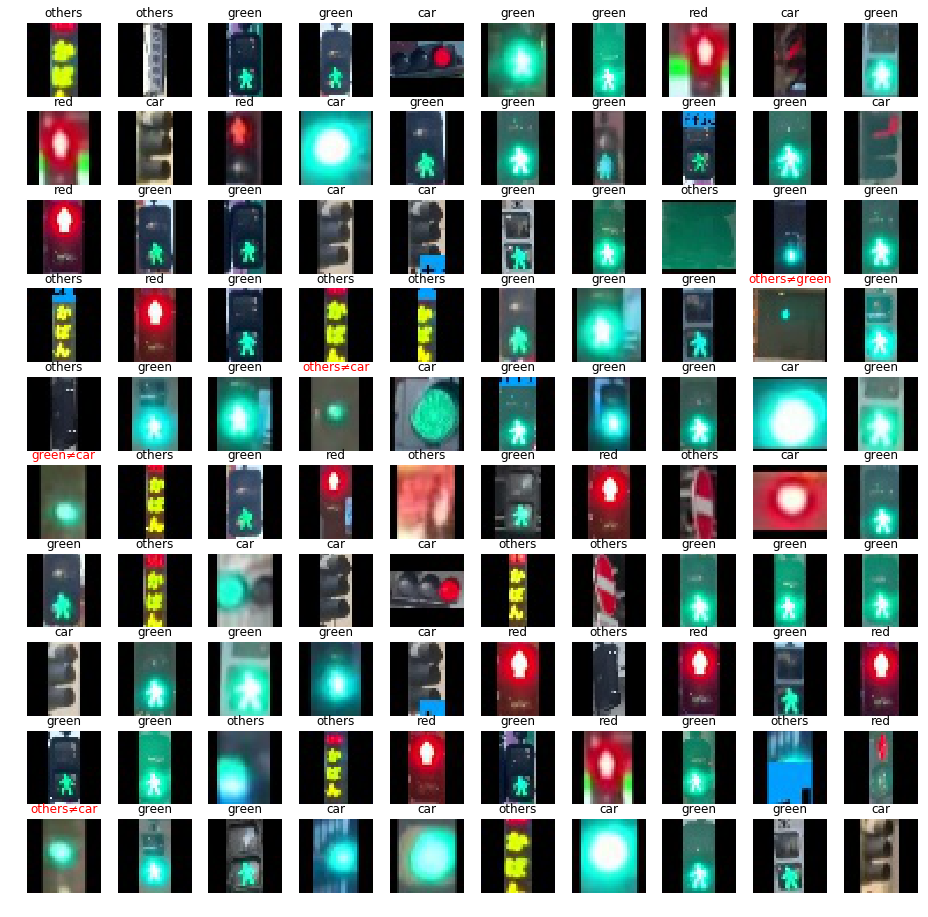

The number of correct answers:  96
The number of mistakes:  4
A correct answer rate:  96.0 %


In [3]:
import cv2
import glob
import re
from PIL import Image
import numpy as np
import keras
from keras.preprocessing.image import load_img, save_img, img_to_array, array_to_img
from sklearn.model_selection import train_test_split
import csv
import pandas as pd

def preprocess(img):
    h, w, c = img.shape
    longest_edge = max(h, w)
    top = 0
    bottom = 0
    left = 0
    right = 0
    if h < longest_edge:
        diff_h = longest_edge - h
        top = diff_h // 2
        bottom = diff_h - top
    elif w < longest_edge:
        diff_w = longest_edge - w
        left = diff_w // 2
        right = diff_w - left
    else:
        pass
    
    img = cv2.copyMakeBorder(img, top, bottom, left, right,
                             cv2.BORDER_CONSTANT, value=[0, 0, 0])
    return img

def numericalSort(value):
    numbers = re.compile(r'(\d+)')
    parts = numbers.split(value)
    parts[1::2] = map(int, parts[1::2])
    return parts

def get_img_path(dir_name:str):
    files = f"{dir_name}/"
    img_path = sorted(glob.glob(str(files+"*.jpg")), key=numericalSort)
    return img_path

img_path = get_img_path("../../img_data/rectangle/trafficLightImg3")
i=1
for file in img_path:
    img = cv2.imread(file)
    img = preprocess(img)
    img = cv2.resize(img, dsize=(32, 32))
    cv2.imwrite("../../img_data/rectangle/preprocessImg3/"+str(i)+".jpg", img)
    i+=1
    
preprocess_path = get_img_path("../../img_data/rectangle/preprocessImg3")
x_train_path, x_test_path = train_test_split(preprocess_path, test_size=0.2, shuffle=False)

x_train = np.zeros((len(x_train_path),32*32*3))
for i in range(len(x_train_path)):
    x_train[i] = np.array(Image.open(x_train_path[i])).reshape(1, 32*32*3)
x_train = x_train.reshape(len(x_train_path), 32, 32, 3)

x_test= np.zeros((len(x_test_path),32*32*3))
for i in range(len(x_test_path)):
    x_test[i] = np.array(Image.open(x_test_path[i])).reshape(1, 32*32*3)
x_test = x_test.reshape(len(x_test_path), 32, 32, 3)

df = pd.read_csv("trafficLight_class3.csv", header=0, usecols=['label'])

y_label = np.zeros(df.values.shape[0])
for j in range(df.values.shape[0]):
    y_label[j] = df.values[j]

# label={0:green, 1:red, 2:car, 3:others}
y_train, y_test = train_test_split(y_label, test_size=0.2, shuffle=False)

trafficLight_labels = np.array([
    'green',
    'red',
    'car',
    'others'
])

model = load_model('./history/use_res_12.h5')

plt.rcParams['figure.figsize'] = (16.0, 16.0)
index = 100
right = 0
mistake = 0
for i in range(index):
    image = x_test[i]/255.0
    data = image.reshape((1, 32, 32, 3))
    plt.subplot(10, 10, i+1)
    plt.imshow(image)
    plt.grid(False)
    plt.axis('off')
    
    pred = model.predict(data)
    bestnum  = 0.0
    bestclass = 0
    for n in [0,1,2,3]:
        if bestnum < pred[0][n]:
            bestnum = pred[0][n]
            bestclass = n
    
    if y_test[i] == bestclass:
        plt.title(trafficLight_labels[bestclass])
        right += 1
    else:
        plt.title(trafficLight_labels[bestclass] + '≠' + trafficLight_labels[int(y_test[i])], color = 'red')
        mistake += 1
        
plt.show()
print("The number of correct answers: ", right)
print("The number of mistakes: ", mistake)
print ("A correct answer rate: ", right/(mistake + right) * 100, '%')